In [ ]:
!sudo pip install --no-deps tensorflow==1.13.1
!sudo pip install --no-deps keras==2.1.0

In [ ]:
%cd
!git clone https://github.com/matterport/Mask_RCNN.git

In [ ]:
%cd ~/Mask_RCNN
!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

In [ ]:
!pip show mask-rcnn

In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [ ]:
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

In [ ]:
def draw_image_with_boxes2(filename, boxes_list,boxes_list_true,labels):
  data = load_img(filename,target_size=(500, 500))
  pyplot.imshow(data)
  ax = pyplot.gca()
  for box in boxes_list:
    y1, x1, y2, x2 = box
    width, height = x2 - x1, y2 - y1
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)
  i=0
  for box in boxes_list_true:
    y1, x1, y2, x2 = box
    width, height = x2 - x1, y2 - y1
    rect = Rectangle((x1, y1), width, height, fill=False, color='blue')
    pyplot.text(x1, y1, labels[i], color='white')
    ax.add_patch(rect)
    i+=1
  pyplot.show()

In [ ]:
%cd ~/Mask_RCNN
rcnn = modellib.MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
rcnn.load_weights('/content/drive/MyDrive/Colab Notebooks/data/mask_rcnn_coco.h5', by_name=True)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [ ]:
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/data/' -d /content/data

In [ ]:
import json
with open('/content/Symbols.json') as json_file:
    symbols = json.load(json_file)

In [ ]:
data={}
symbol_data={}
for s in symbols:
  n=s.split('/')
  if int(n[0])==3:
    tmp=[]
    tmp1=[]
    for bb in symbols[s]:
      tmp.append(bb[:4])
      tmp1.append(bb[4])
    data[n[1]]=tmp
    symbol_data[n[1]]=tmp1
data

In [ ]:
symbol_data

{'10053.jpg': ['Sexiness',
  'Edgy/Sensual',
  'Sexualism',
  'effort',
  'seduction/sex'],
 '100583.jpg': ['technological/handy/ready',
  'confusing',
  'dreams/desires',
  'fun',
  'inventive'],
 '100753.jpg': ['reflection/sleek/fashionable',
  'phone',
  'volume/sound',
  'electronics',
  'hidden'],
 '100783.jpg': ['envious/need/work',
  'Car',
  'diet/smaller',
  'health',
  'exercise'],
 '100823.jpg': ['unique/special/smooth',
  'shave',
  'music',
  'shaving',
  'change'],
 '100943.jpg': ['strong/scary/intense',
  'strength',
  'jittery/hyper',
  'thirst',
  'cool'],
 '100953.jpg': ['scapegoat/energy/extreme',
  'one-of-a-kind',
  'active/problems',
  'coolness',
  'crime'],
 '101073.jpg': ['Legality/unlawful', 'soda', 'Rebel/Fun', 'Illegal', 'retro'],
 '101143.jpg': ['fear/community/unrest',
  'victory',
  'fun/excitement ',
  'Activity',
  'danger'],
 '101383.jpg': ['tough/rugged',
  'yummy',
  'FLAVOR',
  'Taste/Product Placement',
  'neat/ fun'],
 '102173.jpg': ['odd/weird/di

In [ ]:
path="/content/data/3/"

In [ ]:
for image in data:
  img_path=path+image
  img = load_img(img_path,target_size=(500, 500))
  img = img_to_array(img)
  bb_true=data[image]
  labels=symbol_data[image]
  results = rcnn.detect([img], verbose=0)
  draw_image_with_boxes(img_path, results[0]['rois'],bb_true,labels)

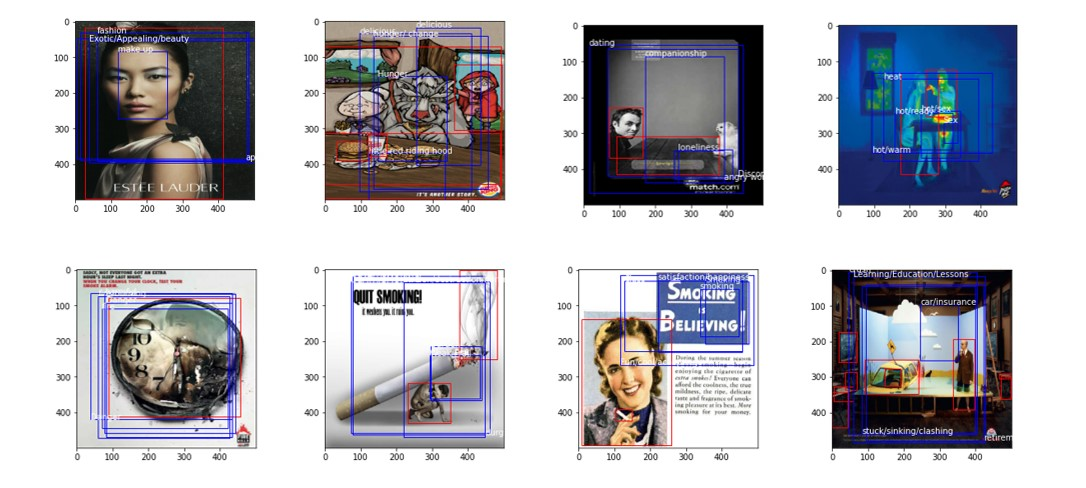